In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.datasets import make_classification
import sklearn.model_selection
from sklearn.model_selection import cross_val_score

In [ ]:
data=pd.read_csv('OJ.csv')
data= data.dropna()
WeekofPurchase=data['WeekofPurchase']
StoreID=data['StoreID']
PriceCH=data['PriceCH'] 
PriceMM=data['PriceMM']
DiscCH=data['DiscCH']
DiscMM=data['DiscMM']
SpecialCH=data['SpecialCH']
SpecialMM=data['SpecialMM'] 
LoyalCH=data['LoyalCH']
SalePriceMM=data['SalePriceMM']
SalePriceCH=data['SalePriceCH']
PriceDiff=data['PriceDiff']
PctDiscMM=data['PctDiscMM']
PctDiscCH=data['PctDiscCH']
ListPriceDiff=data['ListPriceDiff']
STORE=data['STORE']
Purchase=list(data['Purchase'])
purchase=[]
for i in range(len(Purchase)):
    if Purchase[i]=='CH':
        purchase.append(1)
    if Purchase[i]=='MM':
        purchase.append(0)
x=(np.array([WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE])).T
y=np.array(purchase)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
cs=np.linspace(1,30,30)
scores_c=[]
for i in range(len(cs)):
    clf = svm.SVC(kernel='linear', C=cs[i])
    scores_c.append(np.mean(cross_val_score(clf, x_train, y_train, cv=2)))

In [ ]:
plt.plot(cs,scores_c)

In [ ]:
index_best_c=np.argmax(scores_c)
best_c=cs[index_best_c]
best_c

In [61]:
gammas=np.linspace(1,50,50)
scores_g=[]
for i in range(len(gammas)):
    clf = svm.SVC(kernel='rbf', gamma=gammas[i])
    scores_g.append(np.mean(cross_val_score(clf, x_train, y_train, cv=5)))

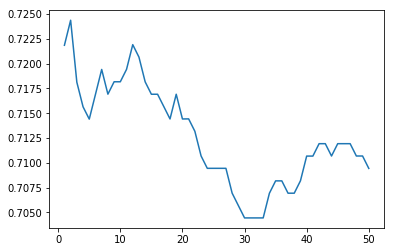

In [62]:
plt.plot(gammas,scores_g)

In [63]:
index_best_gamma=np.argmax(scores_g)
best_gamma=gammas[index_best_gamma]
best_gamma

2.0

In [29]:
clf = svm.SVC(kernel='linear', C=1)
score=cross_val_score(clf, x_train, y_train, cv=1)
score

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

# 